In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [186]:
df_train = pd.read_csv('train_1.csv').fillna(0)

In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [188]:
#pd.melt: unpivot id_vars, and pivot all the rest variables from columns to index.
train_flattened = pd.melt(df_train[list(df_train.columns[-50:])+['Page']], id_vars='Page', var_name='Date', value_name='Clicks')

In [189]:
train_flattened.head()

,Page,Date,Clicks
0,2NE1_zh.wikipedia.org_all-access_spider,2016-11-12,13.0
1,2PM_zh.wikipedia.org_all-access_spider,2016-11-12,12.0
2,3C_zh.wikipedia.org_all-access_spider,2016-11-12,6.0
3,4minute_zh.wikipedia.org_all-access_spider,2016-11-12,38.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-11-12,13.0


In [190]:
train_flattened['Date'] = pd.to_datetime(train_flattened['Date'])

In [191]:
train_flattened['Date']

0         2016-11-12
1         2016-11-12
2         2016-11-12
3         2016-11-12
4         2016-11-12
             ...    
7253145   2016-12-31
7253146   2016-12-31
7253147   2016-12-31
7253148   2016-12-31
7253149   2016-12-31
Name: Date, Length: 7253150, dtype: datetime64[ns]

In [192]:
#Add a column to the DF indicate if weekend or not.
train_flattened['Weekend'] = (train_flattened['Date'].dt.weekday >=5)

In [193]:
#train_flattened = train_flattened.drop('weekend',axis = 1)

In [194]:
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Clicks'].median())

In [195]:
df_median.columns = ['median']

In [196]:
df_mean = pd.DataFrame(train_flattened.groupby(['Page']).mean()['Clicks'])
df_mean.columns = ['mean']

In [197]:
#Merged into one DataFrame
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)
#NEED TO RESET the index set before! 
train_flattened.reset_index(drop=False,inplace=True)

In [199]:
#Split Dates into 3 features
train_flattened['year'] = train_flattened['Date'].dt.year
train_flattened['month'] = train_flattened['Date'].dt.month
train_flattened['day'] = train_flattened['Date'].dt.day

In [201]:
train_flattened

,Page,Date,Clicks,Weekend,mean,median,year,month,day
0,!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,True,2.78,2.0,2016,11,12
1,!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,True,2.78,2.0,2016,11,13
2,!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,False,2.78,2.0,2016,11,14
3,!vote_en.wikipedia.org_all-access_all-agents,2016-11-15,8.0,False,2.78,2.0,2016,11,15
4,!vote_en.wikipedia.org_all-access_all-agents,2016-11-16,3.0,False,2.78,2.0,2016,11,16
...,...,...,...,...,...,...,...,...,...
7253145,［Alexandros］_ja.wikipedia.org_mobile-web_all-a...,2016-12-27,2336.0,False,3457.74,2791.0,2016,12,27
7253146,［Alexandros］_ja.wikipedia.org_mobile-web_all-a...,2016-12-28,2455.0,False,3457.74,2791.0,2016,12,28
7253147,［Alexandros］_ja.wikipedia.org_mobile-web_all-a...,2016-12-29,3302.0,False,3457.74,2791.0,2016,12,29
7253148,［Alexandros］_ja.wikipedia.org_mobile-web_all-a...,2016-12-30,2789.0,False,3457.74,2791.0,2016,12,30


## Visualization

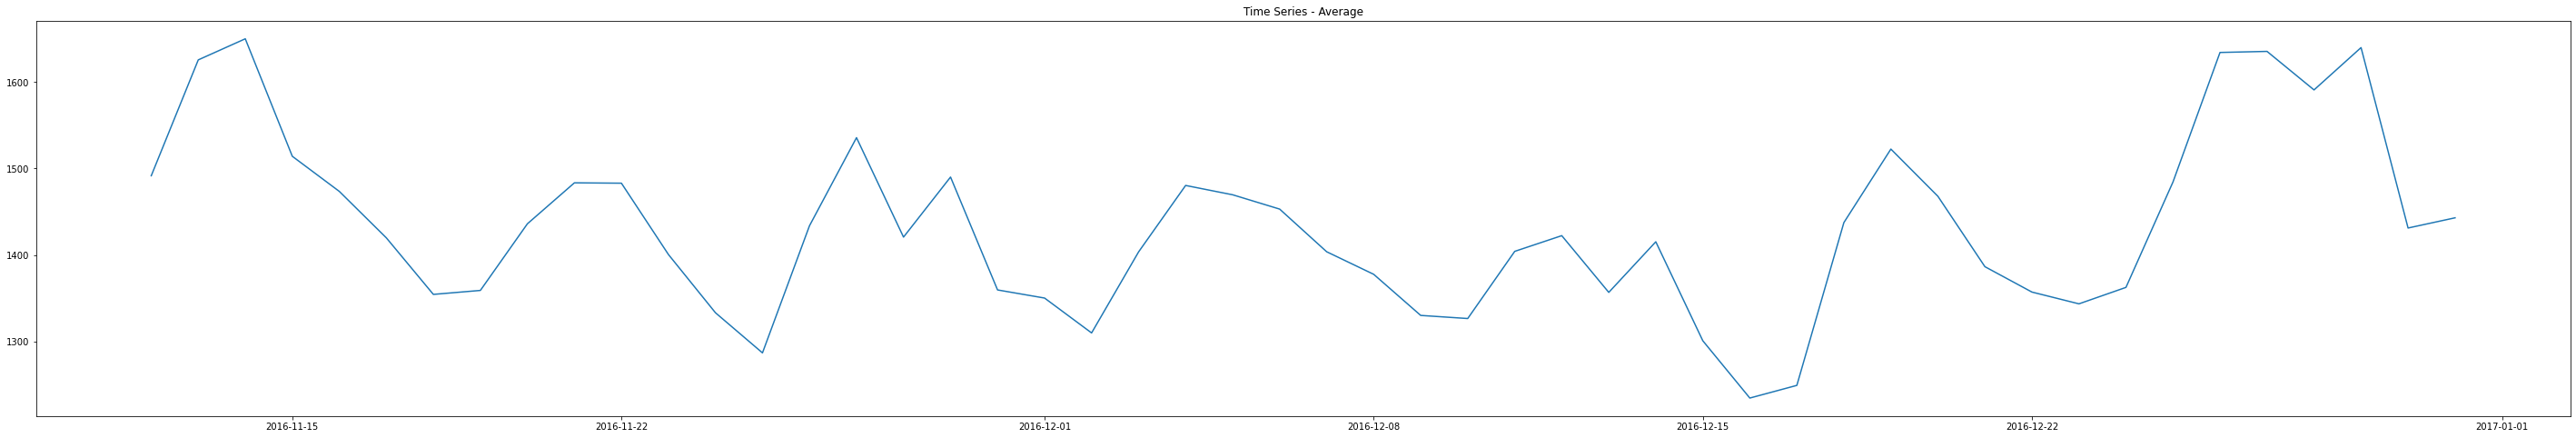

In [207]:
plt.figure(figsize=(50, 8))
mean_group = train_flattened[['Page','Date','Clicks']].groupby(['Date']).mean()['Clicks']
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

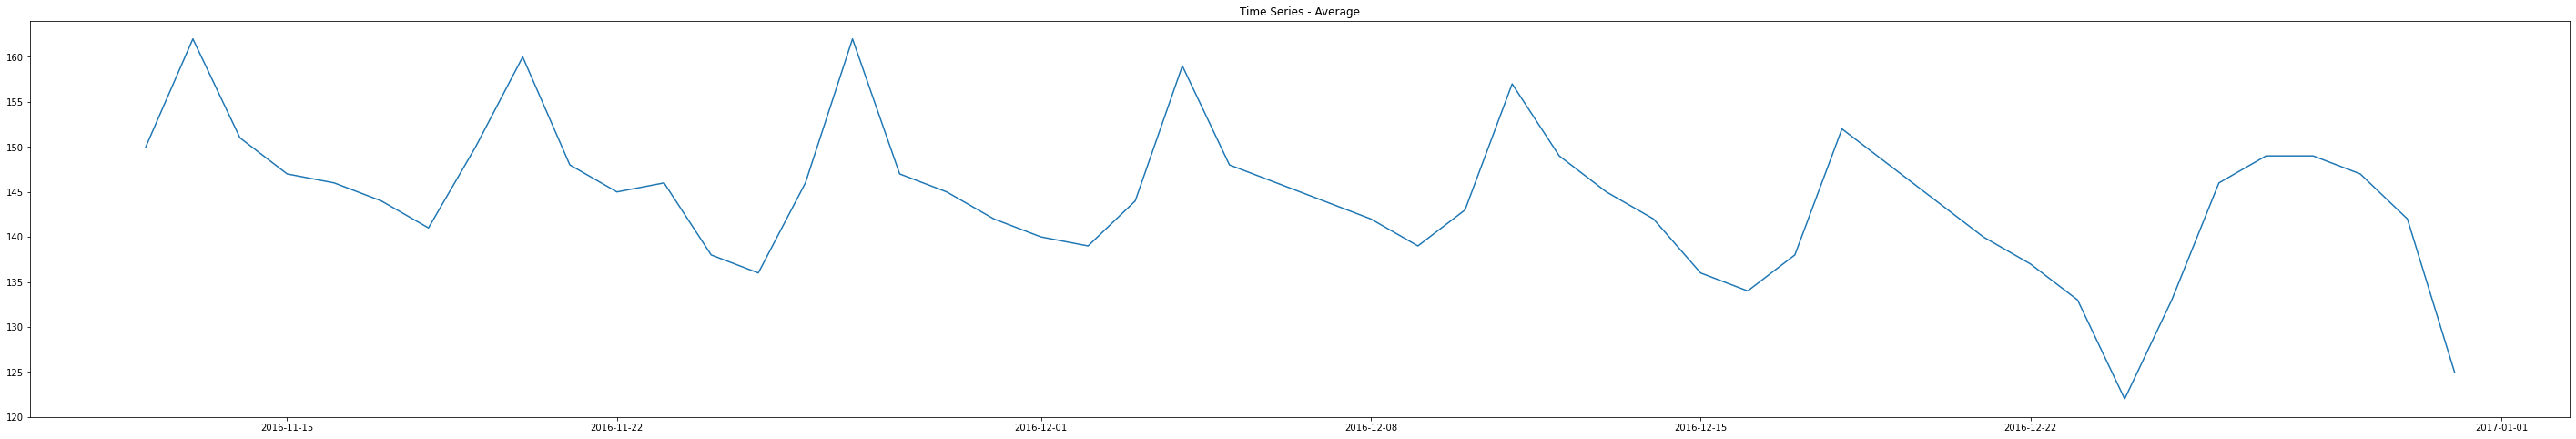

In [209]:
plt.figure(figsize=(50, 8))
median_group = train_flattened[['Page','Date','Clicks']].groupby(['Date']).median()['Clicks']
plt.plot(median_group)
plt.title('Time Series - Average')
plt.show()

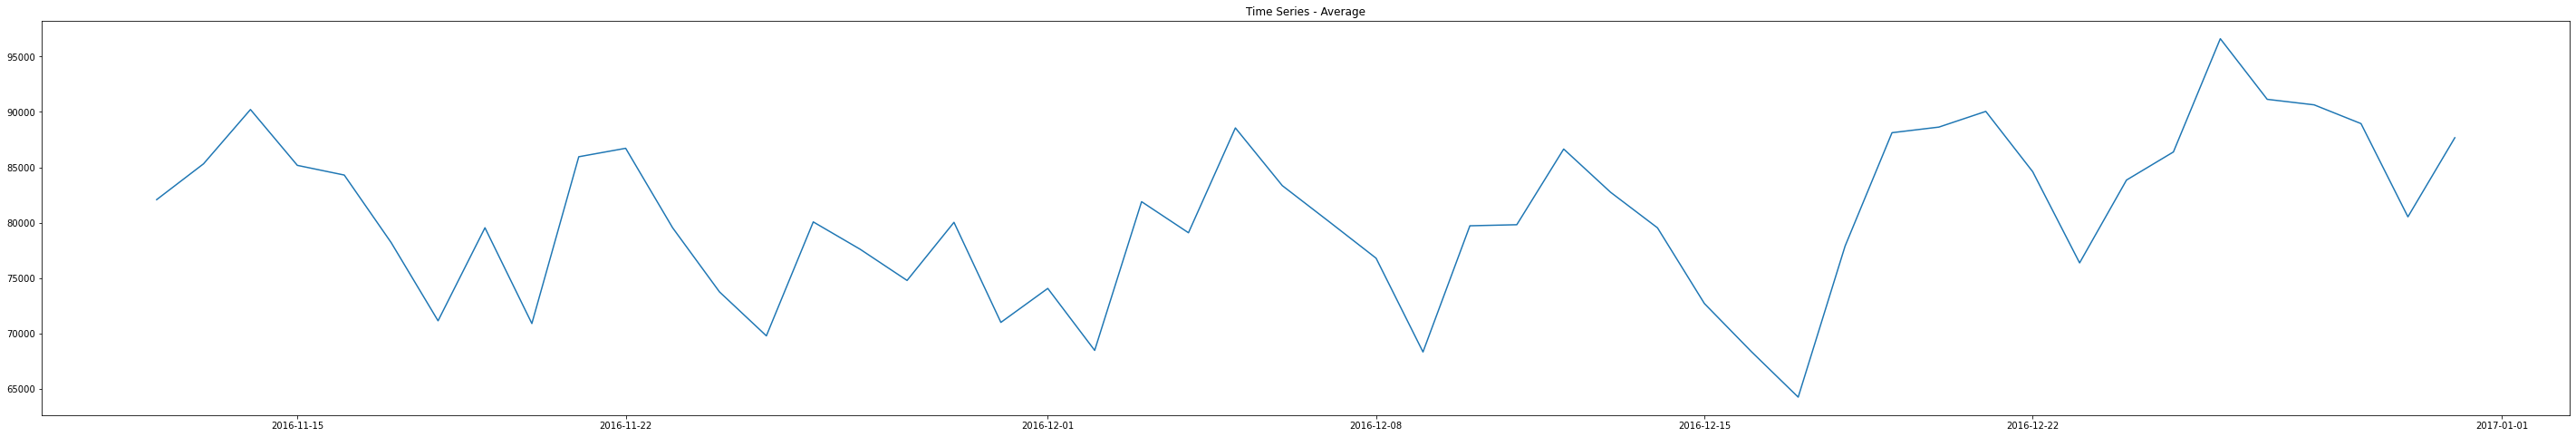

In [214]:
plt.figure(figsize=(50, 8))
std_group = train_flattened[['Page','Date','Clicks']].groupby(['Date']).std()['Clicks']
plt.plot(std_group)
plt.title('Time Series - Average')
plt.show()